# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [93]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [94]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API")

## Load Data

In [95]:
# Read the census data into a Pandas DataFrame
file_path = Path("toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [96]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_types = to_data[["single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"]]
dwelling_type_per_year = dwelling_types.groupby("year").sum()
dwelling_type_per_year

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [97]:
# Save the dataframe as a csv file
dwelling_type_per_year.to_csv('dwelling_type.csv')

In [98]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    fig = plt.figure()
    bar_chart = data.plot.bar(color = color)
    bar_chart.set_title(title)
    bar_chart.set_xlabel(xlabel)
    bar_chart.set_ylabel(ylabel)
    plt.show()
    plt.close(fig)

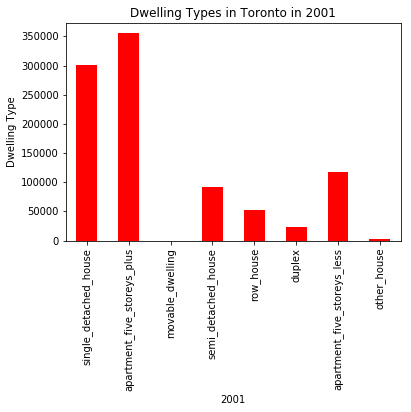

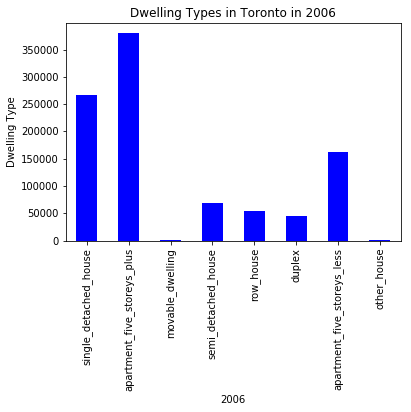

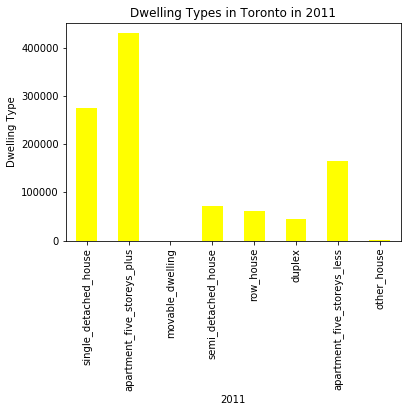

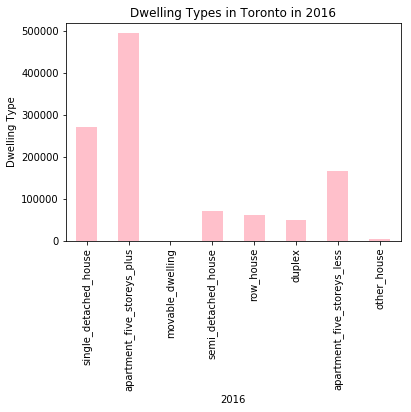

In [99]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
create_bar_chart(dwelling_type_per_year.loc[2001], 'Dwelling Types in Toronto in 2001', '2001', 'Dwelling Type', 'red')

# Bar chart for 2006
create_bar_chart(dwelling_type_per_year.loc[2006], 'Dwelling Types in Toronto in 2006', '2006', 'Dwelling Type', 'blue')

# Bar chart for 2011
create_bar_chart(dwelling_type_per_year.loc[2011], 'Dwelling Types in Toronto in 2011', '2011', 'Dwelling Type', 'yellow')

# Bar chart for 2016
create_bar_chart(dwelling_type_per_year.loc[2016], 'Dwelling Types in Toronto in 2016', '2016', 'Dwelling Type', 'pink')

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [100]:
# Calculate the average monthly shelter costs for owned and rented dwellings
shelter_costs = to_data[["average_house_value", "shelter_costs_owned", "shelter_costs_rented"]].groupby([to_data.index]).mean()
shelter_costs

,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,
2001,289882.885714,846.878571,1085.935714
2006,424059.664286,1316.800000,925.414286
2011,530424.721429,1448.214286,1019.792857
2016,664068.328571,1761.314286,1256.321429


In [101]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    fig = plt.figure()
    bar_chart = data.plot(color = color)
    bar_chart.set_title(title)
    bar_chart.set_xlabel(xlabel)
    bar_chart.set_ylabel(ylabel)
    plt.show()
    plt.close(fig)

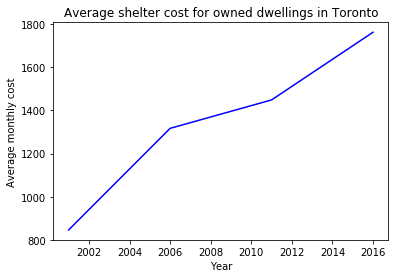

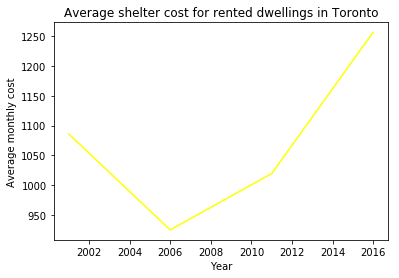

In [102]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(shelter_costs["shelter_costs_owned"], "Average shelter cost for owned dwellings in Toronto", "Year", "Average monthly cost", "blue")

# Line chart for rented dwellings
create_line_chart(shelter_costs["shelter_costs_rented"], "Average shelter cost for rented dwellings in Toronto", "Year", "Average monthly cost", "yellow")

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [103]:
# Calculate the average house value per year
average_house_value_year = to_data["average_house_value"].groupby([to_data.index]).mean()
average_house_value_year

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

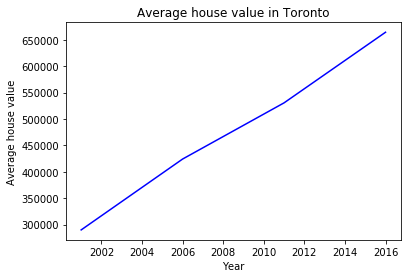

In [104]:
# Plot the average house value per year as a line chart
create_line_chart(average_house_value_year, "Average house value in Toronto", "Year", "Average house value", "blue")

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [105]:
# Create a new DataFrame with the mean house values by neighbourhood per year
average_house_value = to_data[["neighbourhood", "average_house_value"]].groupby(["neighbourhood",to_data.index]).mean()
average_house_value

average_house_value
neighbourhood                year                     
Agincourt North              2001             200388.0
                             2006             293140.0
                             2011             366667.0
                             2016             459051.0
Agincourt South-Malvern West 2001             203047.0
...                                                ...
York University Heights      2016             425769.0
Yorkdale-Glen Park           2001             261784.0
                             2006             382954.0
                             2011             479009.0
                             2016             599698.0

[560 rows x 1 columns]

In [106]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
from panel.interact import interact
from panel import widgets
pn. extension
import hvplot.pandas

In [107]:
average_house_value.hvplot.line(
    "year",
    "average_house_value",
    xlabel="Year",
    ylabel="Avg. House Value",
    groupby="neighbourhood",
).opts(yformatter = "%.0f", frame_height = 300)

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [108]:
# Fetch the data of all dwelling types per year
dwelling_type_per_neighbourhood= to_data[["neighbourhood","single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"]]
dwelling_type_per_neighbourhood = dwelling_type_per_neighbourhood.groupby(["neighbourhood",to_data.index]).sum()
dwelling_type_per_neighbourhood

single_detached_house  \
neighbourhood                year                          
Agincourt North              2001                   3715   
                             2006                   3295   
                             2011                   3385   
                             2016                   3345   
Agincourt South-Malvern West 2001                   3250   
...                                                  ...   
York University Heights      2016                   1235   
Yorkdale-Glen Park           2001                   2540   
                             2006                   2220   
                             2011                   2220   
                             2016                   2165   

                                   apartment_five_storeys_plus  \
neighbourhood                year                                
Agincourt North              2001                         1480   
                             2006                         2060   
                             2011                         2130   
                             2016                         2120   
Agincourt South-Malvern West 2001                         1835   
...                                                        ...   
York University Heights      2016                         5505   
Yorkdale-Glen Park           2001                         1515   
                             2006                         1445   
                             2011                         1245   
                             2016                         1185   

                                   movable_dwelling  semi_detached_house  \
neighbourhood                year                                          
Agincourt North              2001                 0                 1055   
                             2006                 0                  775   
                             2011                 5                  820   
                             2016                 5                  805   
Agincourt South-Malvern West 2001                 0                  545   
...                                             ...                  ...   
York University Heights      2016                 0                 1360   
Yorkdale-Glen Park           2001                 0                   60   
                             2006                 0                   70   
                             2011                 0                   85   
                             2016                 0                   80   

                                   row_house  duplex  \
neighbourhood                year                      
Agincourt North              2001       1295     195   
                             2006       1425     600   
                             2011       1465     610   
                             2016       1440     645   
Agincourt South-Malvern West 2001        455     105   
...                                      ...     ...   
York University Heights      2016        775     280   
Yorkdale-Glen Park           2001        265     120   
                             2006        470     435   
                             2011        465     490   
                             2016        600     465   

                                   apartment_five_storeys_less  other_house  
neighbourhood                year                                            
Agincourt North              2001                          185            5  
                             2006                          565            0  
                             2011                          705           20  
                             2016                          735           15  
Agincourt South-Malvern West 2001                          425            0  
...                                                        ...          ...  
York University Heights      2016                    

In [109]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
dwelling_type_per_neighbourhood.hvplot.bar(
    "year",
    ["single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"],
    xlabel="Year",
    ylabel="Dwelling Type Units",
    groupby="neighbourhood",
    rot=90
).opts(frame_height = 300)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [110]:
# Getting the data from the top 10 expensive neighbourhoods
top_10 = to_data[["neighbourhood", "average_house_value"]].groupby(["neighbourhood"]).mean()
top_10 = top_10.sort_values("average_house_value", ascending=False).nlargest(10, "average_house_value")
top_10

,average_house_value
neighbourhood,
Bridle Path-Sunnybrook-York Mills,1526485.75
Forest Hill South,1195992.50
Lawrence Park South,1094027.75
Rosedale-Moore Park,1093640.00
St.Andrew-Windfields,999107.00
Casa Loma,981064.25
Bedford Park-Nortown,930415.25
Forest Hill North,851680.50
Kingsway South,843234.25


In [111]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10.hvplot.bar(x="neighbourhood", y='average_house_value', xlabel = "Neighbourhood", ylabel = "Average House Value", rot=90, title = "Top 10 Expensive Neighbourhoods in Toronto").opts(yformatter = "%.0f", frame_height = 500)

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [112]:
# Load neighbourhoods coordinates data
file_path = Path("toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path, index_col="neighbourhood")
df_neighbourhood_locations.head()

,lat,lon
neighbourhood,,
Agincourt North,43.805441,-79.266712
Agincourt South-Malvern West,43.788658,-79.265612
Alderwood,43.604937,-79.541611
Annex,43.671585,-79.404001
Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [113]:
# Calculate the mean values for each neighborhood
mean_neighbourhood_value = to_data[["neighbourhood", "average_house_value"]].groupby(["neighbourhood"]).mean()
mean_neighbourhood_value.head()

,average_house_value
neighbourhood,
Agincourt North,329811.5
Agincourt South-Malvern West,334189.0
Alderwood,427922.5
Annex,746977.0
Banbury-Don Mills,612039.0


In [114]:
# Join the average values with the neighbourhood locations
mean_neighbourhood_location = pd.concat(
    [df_neighbourhood_locations, mean_neighbourhood_value], axis="columns", join="inner"
)

mean_neighbourhood_location = mean_neighbourhood_location.drop_duplicates().dropna()
mean_neighbourhood_location.head()

,lat,lon,average_house_value
neighbourhood,,,
Agincourt North,43.805441,-79.266712,329811.5
Agincourt South-Malvern West,43.788658,-79.265612,334189.0
Alderwood,43.604937,-79.541611,427922.5
Annex,43.671585,-79.404001,746977.0
Banbury-Don Mills,43.737657,-79.349718,612039.0


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [115]:
# Create a scatter mapbox to analyze neighbourhood info
# Set the mapbox API
px.set_mapbox_access_token=(map_box_api)

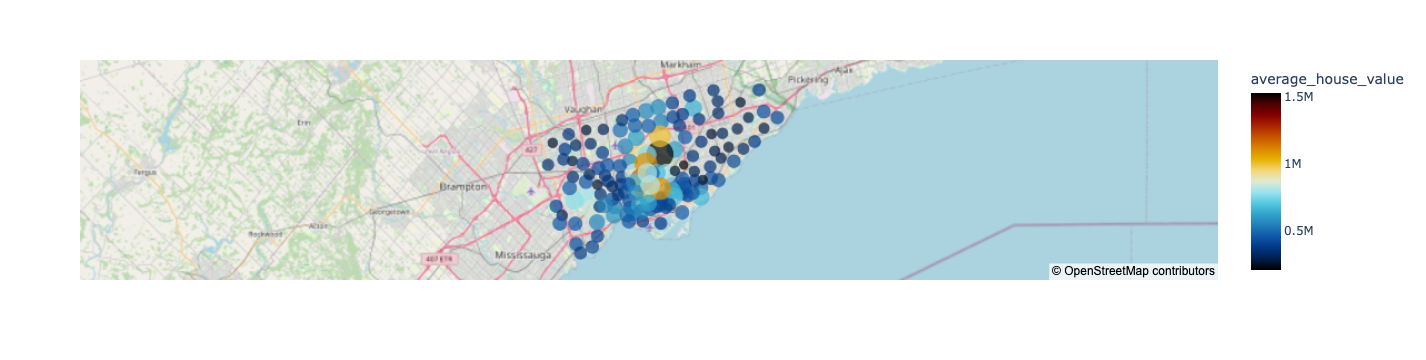

In [122]:
# Plot Data
map_plot = px.scatter_mapbox(
    mean_neighbourhood_location,
    lat = "lat",
    lon = "lon",
    size = "average_house_value",
    color = "average_house_value",
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom = 8.5
)

# Display the map
map_plot = map_plot.update_mapboxes(style='open-street-map')
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

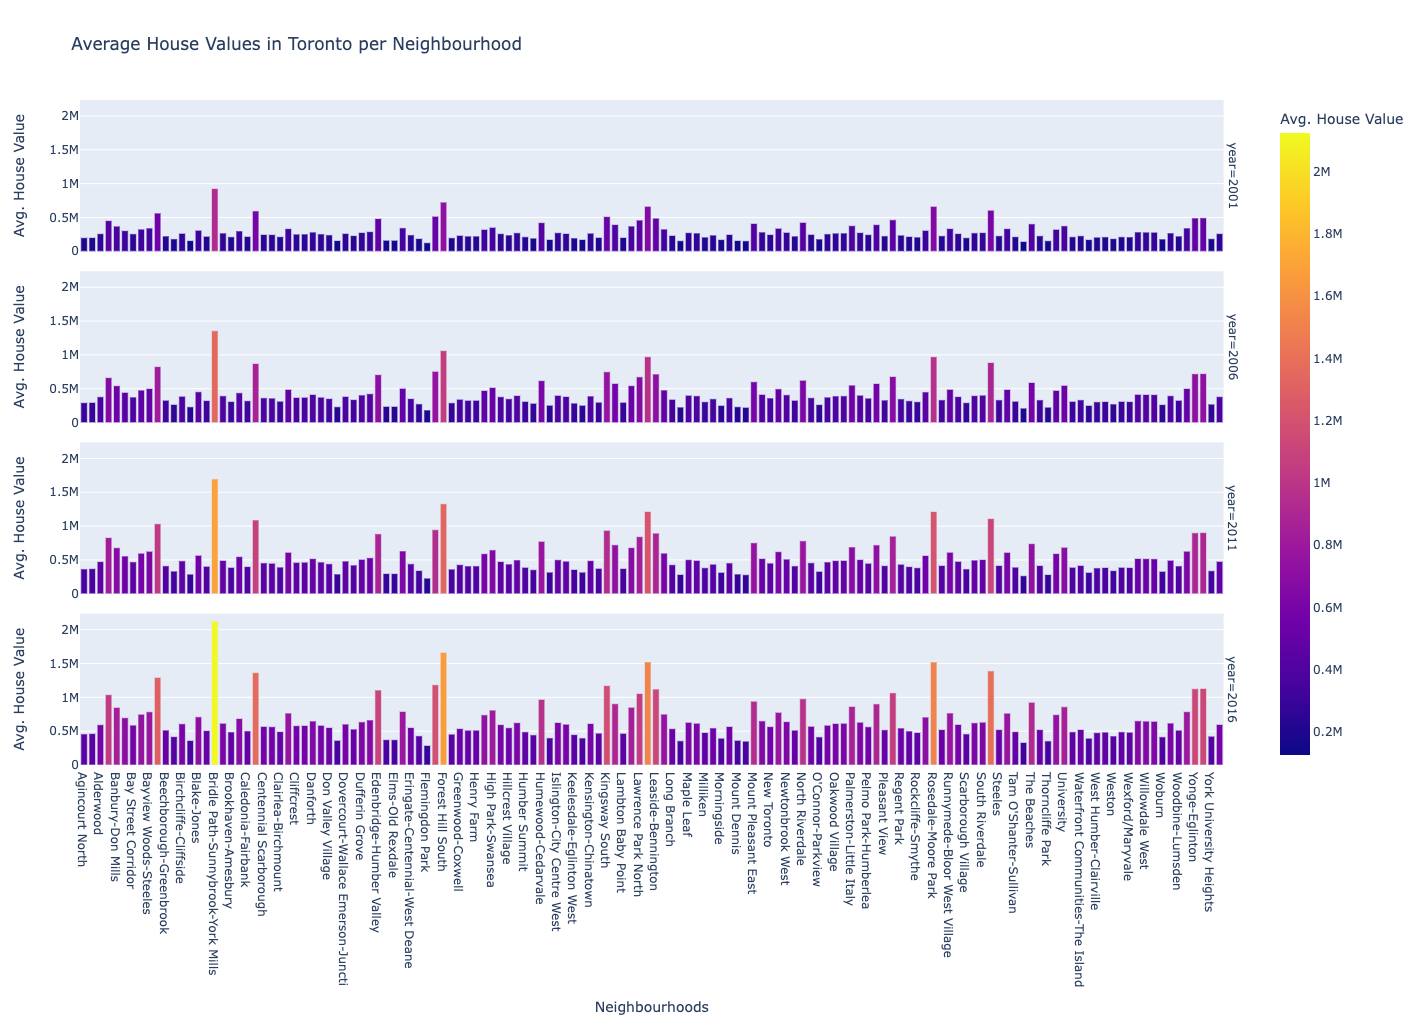

In [117]:
fig = px.bar(
    to_data,
    x="neighbourhood",
    y="average_house_value",
    color="average_house_value",
    height=1024,
    facet_row=to_data.index,
    title="Average House Values in Toronto per Neighbourhood",
    labels={
        "neighbourhood": "Neighbourhoods",
        "average_house_value": "Avg. House Value"
    }
)
    
fig

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [118]:
# Fetch the data from all expensive neighbourhoods per year.
top_10_by_year = to_data[["neighbourhood", "average_house_value"]].groupby([to_data.index, "neighbourhood"]).mean()
top_10_by_year

average_house_value
year neighbourhood                                    
2001 Agincourt North                          200388.0
     Agincourt South-Malvern West             203047.0
     Alderwood                                259998.0
     Annex                                    453850.0
     Banbury-Don Mills                        371864.0
...                                                ...
2016 Wychwood                                 787760.0
     Yonge-Eglinton                          1127052.0
     Yonge-St.Clair                          1131888.0
     York University Heights                  425769.0
     Yorkdale-Glen Park                       599698.0

[560 rows x 1 columns]

In [119]:
df_expensive_neighbourhoods = to_data.groupby(by="neighbourhood").mean()
df_expensive_neighbourhoods = df_expensive_neighbourhoods.sort_values(
    by="average_house_value", ascending=False
).head(10)
df_expensive_neighbourhoods = df_expensive_neighbourhoods.reset_index()
df_expensive_neighbourhoods_per_year.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Bedford Park-Nortown,4985,2080,0,45,40,210,1235,15,565304,933,1491
1,2001,Bridle Path-Sunnybrook-York Mills,2275,110,0,25,15,10,20,0,927466,1983,1790
2,2001,Casa Loma,1035,1700,0,415,190,185,1090,5,596077,1241,1500
3,2001,Forest Hill North,1565,3380,0,10,0,0,485,5,517466,940,1428
4,2001,Forest Hill South,1815,2440,5,65,45,85,1010,15,726664,1001,1469


In [120]:
df_expensive_neighbourhoods_per_year = to_data[to_data["neighbourhood"].isin(df_expensive_neighbourhoods["neighbourhood"])]
df_expensive_neighbourhoods_per_year = df_expensive_neighbourhoods_per_year.reset_index()
df_expensive_neighbourhoods_per_year.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Bedford Park-Nortown,4985,2080,0,45,40,210,1235,15,565304,933,1491
1,2001,Bridle Path-Sunnybrook-York Mills,2275,110,0,25,15,10,20,0,927466,1983,1790
2,2001,Casa Loma,1035,1700,0,415,190,185,1090,5,596077,1241,1500
3,2001,Forest Hill North,1565,3380,0,10,0,0,485,5,517466,940,1428
4,2001,Forest Hill South,1815,2440,5,65,45,85,1010,15,726664,1001,1469


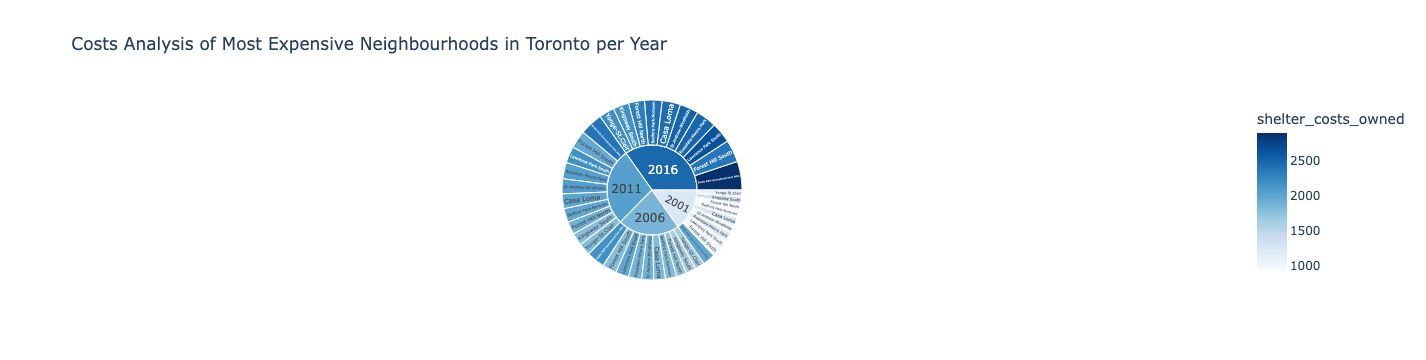

In [121]:
# Create the sunburst chart
fig = px.sunburst(
    df_expensive_neighbourhoods_per_year,
    path=["year", "neighbourhood"],
    values='average_house_value',
    color='shelter_costs_owned',
    hover_data=['shelter_costs_owned', 'shelter_costs_rented'],
    color_continuous_scale='Blues',
    title="Costs Analysis of Most Expensive Neighbourhoods in Toronto per Year"
)
    
fig